# Introduction

The dataset is from kaggle you can view it and understand columns from this link
https://www.kaggle.com/lava18/google-play-store-apps


## Questions

- What is the most expensive app on the store.
- Which Genre has more apps.
- What is the average size of the free apps & paid apps.
- What is the 5 top expenisve apps that has rate of 5.
- How many apps that has more than 50K reviews.
- What is the average price of the apps for each genre with each installs numbers.
- How many apps have rating > 4.7 and what is thier avg price.
- How much google earned from the 5,000,000+ installed apps
- What is the max and min size for free and paid apps.
- is there a correlation between rating, Reviews, Size with the price of the app
- How many apps for each type for each content reading.
- How many apps that can work on android version 4

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

# Load the data

In [2]:
df = pd.read_csv('googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Distinguish the features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Data Cleaning

**fix Rating**

In [4]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [3]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


**fix Size**

In [8]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [4]:
def fix_size(s):
    try:
        if s.endswith('M'):
            return float(s[:-1])
        elif s.endswith('k'):
            return float(s[:-1]) / 1024 # 1M = 1024k
        elif s == '1,000+':
            return 1.0
        else:
            return np.nan
    except:
        return np.nan
        

In [5]:
df['Size'] = df['Size'].apply(fix_size)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


**fix Price**

In [12]:
df['Price'].nunique()

93

In [7]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [8]:
df['Price'].value_counts()

Price
0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: count, Length: 93, dtype: int64

In [6]:
def fix_price(p):
    try:
        if p.startswith('$'):
            return float(p[1:])
        else:
            return 0.0
    except:
        return np.nan

In [7]:
df['Price'] = df['Price'].apply(fix_price)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [11]:
df[df['Price']>0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.800000,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39.000000,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.800000,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39.000000,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,NaN,"100,000+",Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17.0,0.153320,100+,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35.0,2.400000,"1,000+",Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252.0,11.000000,"10,000+",Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405.0,9.500000,"10,000+",Paid,1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


In [12]:
df['Price'].value_counts()

Price
0.00     10041
0.99       148
2.99       129
1.99        73
4.99        72
         ...  
19.90        1
1.75         1
14.00        1
4.85         1
1.04         1
Name: count, Length: 92, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [15]:
df.describe()

,Rating,Reviews,Size,Price
count,9367.000000,1.084000e+04,9146.000000,10841.000000
mean,4.193338,4.441529e+05,21.513922,1.027273
std,0.537431,2.927761e+06,22.588868,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,19.000000,7.815831e+07,100.000000,400.000000


In [8]:
idx = df[  df['Rating'] > 5  ].index
idx

Index([10472], dtype='int64')

In [9]:
df.drop(idx, axis=0, inplace=True)

In [14]:
df.describe()

,Rating,Reviews,Size,Price
count,9366.000000,1.084000e+04,9145.000000,10840.000000
mean,4.191757,4.441529e+05,21.516165,1.027368
std,0.515219,2.927761e+06,22.589084,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


In [13]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
df['Category'].unique()


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [10]:
df['Category'] = df['Category'].apply(lambda c: c.lower())

df['Category'].unique()


array(['art_and_design', 'auto_and_vehicles', 'beauty',
       'books_and_reference', 'business', 'comics', 'communication',
       'dating', 'education', 'entertainment', 'events', 'finance',
       'food_and_drink', 'health_and_fitness', 'house_and_home',
       'libraries_and_demo', 'lifestyle', 'game', 'family', 'medical',
       'social', 'shopping', 'photography', 'sports', 'travel_and_local',
       'tools', 'personalization', 'productivity', 'parenting', 'weather',
       'video_players', 'news_and_magazines', 'maps_and_navigation'],
      dtype=object)

In [15]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [11]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

In [12]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [13]:
df['Content Rating'].unique()


array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [25]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,art_and_design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,art_and_design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,family,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,family,5.0,4.0,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,medical,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,books_and_reference,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [26]:
df.drop(['Genres', 'Last Updated', 'Current Ver'], axis=1, inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,4.0.3 and up
1,Coloring book moana,art_and_design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,art_and_design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,family,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,family,5.0,4.0,3.6,100+,Free,0.0,Everyone,4.1 and up
10838,Parkinson Exercices FR,medical,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,2.2 and up
10839,The SCP Foundation DB fr nn5n,books_and_reference,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Varies with device


In [18]:
for v in df['Android Ver'].unique():
    print(v)

4.0.3 and up
4.2 and up
4.4 and up
2.3 and up
3.0 and up
4.1 and up
4.0 and up
2.3.3 and up
Varies with device
2.2 and up
5.0 and up
6.0 and up
1.6 and up
1.5 and up
2.1 and up
7.0 and up
5.1 and up
4.3 and up
4.0.3 - 7.1.1
2.0 and up
3.2 and up
4.4W and up
7.1 and up
7.0 - 7.1.1
8.0 and up
5.0 - 8.0
3.1 and up
2.0.1 and up
4.1 - 7.1.1
nan
5.0 - 6.0
1.0 and up
2.2 - 7.1.1
5.0 - 7.1.1


In [11]:
def check_ver_4(version):
    try:
        if version.startswith('4'):
            return 'Yes'
        else:
            return 'No'
    except:
        return np.nan

In [12]:
df['is_working_on_ver_4'] = df['Android Ver'].apply(check_ver_4)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,is_working_on_ver_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Yes
1,Coloring book moana,art_and_design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Yes
3,Sketch - Draw & Paint,art_and_design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Yes
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,family,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Yes
10837,Fr. Mike Schmitz Audio Teachings,family,5.0,4.0,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Yes
10838,Parkinson Exercices FR,medical,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,No
10839,The SCP Foundation DB fr nn5n,books_and_reference,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,No


In [30]:
df.drop('Android Ver', axis=1, inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_working_on_ver_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Yes
1,Coloring book moana,art_and_design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Yes
3,Sketch - Draw & Paint,art_and_design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Yes
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Yes
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,family,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,Yes
10837,Fr. Mike Schmitz Audio Teachings,family,5.0,4.0,3.6,100+,Free,0.0,Everyone,Yes
10838,Parkinson Exercices FR,medical,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,No
10839,The SCP Foundation DB fr nn5n,books_and_reference,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,No


In [31]:
df.isna().sum()

App                       0
Category                  0
Rating                 1474
Reviews                   0
Size                   1695
Installs                  0
Type                      1
Price                     0
Content Rating            0
is_working_on_ver_4       2
dtype: int64

In [32]:
df.shape[0]

10840

In [33]:
(df.isna().sum() / df.shape[0]) * 100

App                     0.000000
Category                0.000000
Rating                 13.597786
Reviews                 0.000000
Size                   15.636531
Installs                0.000000
Type                    0.009225
Price                   0.000000
Content Rating          0.000000
is_working_on_ver_4     0.018450
dtype: float64

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
imputer = SimpleImputer(strategy='most_frequent')

df['is_working_on_ver_4'] = imputer.fit_transform(df[['is_working_on_ver_4']])
df['Type'] = imputer.fit_transform(df[['Type']])

In [37]:
df.isna().sum()

App                       0
Category                  0
Rating                 1474
Reviews                   0
Size                   1695
Installs                  0
Type                      0
Price                     0
Content Rating            0
is_working_on_ver_4       0
dtype: int64

In [80]:
from sklearn.impute import KNNImputer

In [81]:
imputer = KNNImputer()

In [82]:
df['Rating'] = imputer.fit_transform(df[['Rating']])
df['Size'] = imputer.fit_transform(df[['Size']])

In [83]:
df.isna().sum()

App                    0
Category               0
Rating                 0
Reviews                0
Size                   0
Installs               0
Type                   0
Price                  0
Content Rating         0
is_working_on_ver_4    0
dtype: int64

In [84]:
df.describe()

,Rating,Reviews,Size,Price
count,10840.000000,1.084000e+04,10840.000000,10840.000000
mean,4.191757,4.441529e+05,21.516165,1.027368
std,0.478907,2.927761e+06,20.747804,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.100000,3.800000e+01,5.900000,0.000000
50%,4.200000,2.094000e+03,18.000000,0.000000
75%,4.500000,5.477550e+04,26.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


In [85]:
from datasist.structdata import detect_outliers

In [97]:
idx = detect_outliers(df, 0, ['Rating', 'Reviews', 'Size', 'Price'])
idx

[15,
 87,
 159,
 176,
 209,
 311,
 312,
 325,
 477,
 492,
 501,
 510,
 513,
 514,
 518,
 520,
 522,
 527,
 528,
 533,
 546,
 549,
 554,
 555,
 572,
 578,
 588,
 611,
 619,
 625,
 645,
 663,
 678,
 681,
 684,
 694,
 696,
 862,
 869,
 885,
 915,
 1056,
 1057,
 1186,
 1190,
 1213,
 1217,
 1263,
 1472,
 1491,
 1528,
 1548,
 1561,
 1571,
 1576,
 1591,
 1594,
 1782,
 1784,
 2087,
 2249,
 2260,
 2264,
 2266,
 2295,
 2300,
 2317,
 2327,
 2329,
 2337,
 2351,
 2355,
 2360,
 2387,
 2403,
 2408,
 2411,
 2412,
 2428,
 2487,
 2492,
 2517,
 2521,
 2531,
 2535,
 2702,
 2824,
 3001,
 3021,
 3023,
 3034,
 3131,
 3133,
 3137,
 3139,
 3146,
 3165,
 3247,
 3250,
 3262,
 3268,
 3271,
 3273,
 3279,
 3460,
 3483,
 3698,
 3709,
 3741,
 3748,
 3891,
 3938,
 3955,
 3961,
 3962,
 3963,
 3972,
 3979,
 4006,
 4010,
 4062,
 4066,
 4078,
 4127,
 4135,
 4161,
 4164,
 4165,
 4168,
 4171,
 4181,
 4187,
 4194,
 4209,
 4210,
 4226,
 4230,
 4251,
 4253,
 4258,
 4331,
 4361,
 4373,
 4375,
 4386,
 4389,
 4392,
 4470,
 4492,


In [98]:
outliers = df.loc[idx] 
clean = df.drop(idx, axis=0)

In [99]:
outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_working_on_ver_4
15,Learn To Draw Kawaii Characters,art_and_design,3.200000,55.0,2.700000,"5,000+",Free,0.00,Everyone,Yes
87,RST - Sale of cars on the PCT,auto_and_vehicles,3.200000,250.0,1.100000,"100,000+",Free,0.00,Everyone,Yes
159,Cloud of Books,books_and_reference,3.300000,1862.0,19.000000,"1,000,000+",Free,0.00,Everyone,Yes
176,Free Book Reader,books_and_reference,3.400000,1680.0,4.000000,"100,000+",Free,0.00,Everyone,Yes
209,Plugin:AOT v5.0,business,3.100000,4034.0,0.022461,"100,000+",Free,0.00,Everyone,No
...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,family,4.191757,17.0,0.153320,100+,Paid,0.99,Mature 17+,No
10760,Fast Tract Diet,health_and_fitness,4.400000,35.0,2.400000,"1,000+",Paid,7.99,Everyone,Yes
10782,Trine 2: Complete Story,game,3.800000,252.0,11.000000,"10,000+",Paid,16.99,Teen,No
10785,"sugar, sugar",family,4.200000,1405.0,9.500000,"10,000+",Paid,1.20,Everyone,No


In [100]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_working_on_ver_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.100000,159.0,19.000000,"10,000+",Free,0.0,Everyone,Yes
1,Coloring book moana,art_and_design,3.900000,967.0,14.000000,"500,000+",Free,0.0,Everyone,Yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.700000,87510.0,8.700000,"5,000,000+",Free,0.0,Everyone,Yes
3,Sketch - Draw & Paint,art_and_design,4.500000,215644.0,25.000000,"50,000,000+",Free,0.0,Teen,Yes
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.300000,967.0,2.800000,"100,000+",Free,0.0,Everyone,Yes
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,family,4.500000,38.0,53.000000,"5,000+",Free,0.0,Everyone,Yes
10837,Fr. Mike Schmitz Audio Teachings,family,5.000000,4.0,3.600000,100+,Free,0.0,Everyone,Yes
10838,Parkinson Exercices FR,medical,4.191757,3.0,9.500000,"1,000+",Free,0.0,Everyone,No
10839,The SCP Foundation DB fr nn5n,books_and_reference,4.500000,114.0,21.516165,"1,000+",Free,0.0,Mature 17+,No


In [102]:
# What is the most expensive app on the store.
df[  df['Price'] == df['Price'].max()  ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_working_on_ver_4
4367,I'm Rich - Trump Edition,lifestyle,3.6,275.0,7.3,"10,000+",Paid,400.0,Everyone,Yes


In [103]:
# Which Genre has more apps.
df['Category'].value_counts()

family                 1972
game                   1144
tools                   843
medical                 463
business                460
productivity            424
personalization         392
communication           387
sports                  384
lifestyle               382
finance                 366
health_and_fitness      341
photography             335
social                  295
news_and_magazines      283
shopping                260
travel_and_local        258
dating                  234
books_and_reference     231
video_players           175
education               156
entertainment           149
maps_and_navigation     137
food_and_drink          127
house_and_home           88
libraries_and_demo       85
auto_and_vehicles        85
weather                  82
art_and_design           65
events                   64
parenting                60
comics                   60
beauty                   53
Name: Category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Category'>

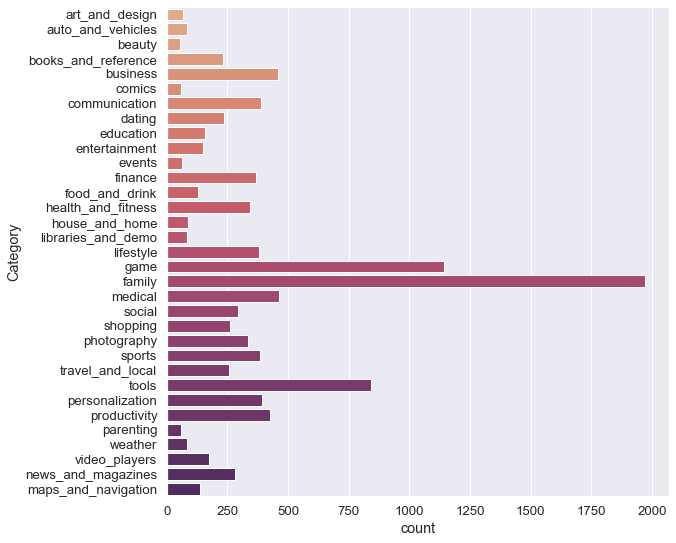

In [107]:
sns.countplot(y='Category', data=df, palette='flare')

In [109]:
# What is the average size of the free apps & paid apps.
df.groupby('Type').mean()['Size']

Type
Free    21.675505
Paid    19.516453
Name: Size, dtype: float64

<AxesSubplot:xlabel='Type', ylabel='Size'>

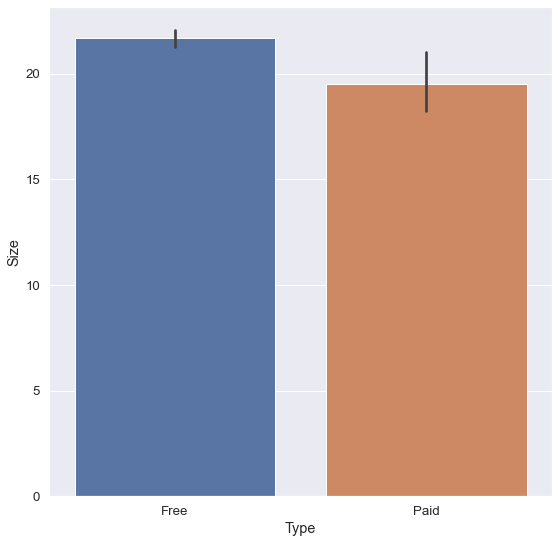

In [115]:
sns.barplot(x='Type', y='Size', data=df, estimator=np.mean)

In [112]:
# What is the 5 top expenisve apps that has rate of 5.
df[  df['Rating'] == 5  ].sort_values(by='Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_working_on_ver_4
5489,AP Art History Flashcards,family,5.0,1.0,96.000000,10+,Paid,29.99,Mature 17+,Yes
7477,USMLE Step 2 CK Flashcards,family,5.0,1.0,40.000000,10+,Paid,19.99,Everyone,No
5246,Hey AJ! It's Bedtime!,family,5.0,1.0,63.000000,10+,Paid,4.99,Everyone,No
7204,TI-84 CE Graphing Calculator Manual TI 84,family,5.0,1.0,27.000000,100+,Paid,4.99,Everyone,Yes
5482,meStudying: AP English Lit,family,5.0,1.0,0.639648,10+,Paid,4.99,Everyone,No


In [114]:
# How many apps that has more than 50K reviews.
df[  df['Reviews'] > 50000  ].sort_values(by='Reviews')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_working_on_ver_4
3043,DraftKings - Daily Fantasy Sports,sports,4.5,50017.0,41.000000,"1,000,000+",Free,0.0,Adults only 18+,Yes
9677,Masha and The Bear Jam Day Match 3 games for kids,family,4.6,50060.0,98.000000,"1,000,000+",Free,0.0,Everyone,Yes
8294,Bokeh (Background defocus),photography,4.0,50109.0,21.516165,"10,000,000+",Free,0.0,Everyone,No
3098,Fantasy Football,sports,3.5,50179.0,23.000000,"1,000,000+",Free,0.0,Everyone,No
3046,Fantasy Football,sports,3.5,50179.0,23.000000,"1,000,000+",Free,0.0,Everyone,No
...,...,...,...,...,...,...,...,...,...,...
3904,WhatsApp Messenger,communication,4.4,69109672.0,21.516165,"1,000,000,000+",Free,0.0,Everyone,No
336,WhatsApp Messenger,communication,4.4,69119316.0,21.516165,"1,000,000,000+",Free,0.0,Everyone,No
381,WhatsApp Messenger,communication,4.4,69119316.0,21.516165,"1,000,000,000+",Free,0.0,Everyone,No
3943,Facebook,social,4.1,78128208.0,21.516165,"1,000,000,000+",Free,0.0,Teen,No


In [120]:
# What is the average price of the apps for each genre with each installs numbers.
x = pd.pivot_table(index='Category', columns='Installs', values='Price', data=df, aggfunc=np.mean)
x

Installs,0,0+,1+,"1,000+","1,000,000+","1,000,000,000+",10+,"10,000+","10,000,000+",100+,...,"100,000,000+",5+,"5,000+","5,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
Category,,,,,,,,,,,,,,,,,,,,,
art_and_design,NaN,0.000,NaN,0.663333,0.000000,NaN,NaN,0.180909,0.000000,0.000000,...,NaN,NaN,0.398000,0.0,NaN,0.000000,0.0,NaN,0.000000,NaN
auto_and_vehicles,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.248333,...,NaN,0.000000,0.000000,0.0,9.990000,0.398000,NaN,0.000000,0.000000,NaN
beauty,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,NaN
books_and_reference,NaN,NaN,5.990000,0.149118,0.000000,0.0,3.996842,0.179600,0.000000,0.570000,...,0.0,1.852857,0.474375,0.0,0.583333,0.000000,NaN,0.220000,0.000000,NaN
business,NaN,0.000,0.000000,0.183265,0.000000,NaN,2.201905,0.065000,0.000000,0.432763,...,0.0,0.055000,0.000000,0.0,0.359600,0.000000,0.0,0.782174,0.000000,NaN
comics,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,NaN,0.000000,NaN
communication,NaN,NaN,0.000000,0.294091,0.066444,0.0,1.392105,0.478400,0.000000,0.210606,...,0.0,0.000000,0.393158,0.0,0.000000,0.000000,0.0,0.906364,0.000000,0.0
dating,NaN,NaN,0.000000,0.411176,0.000000,NaN,0.000000,0.295556,0.000000,0.787895,...,NaN,0.000000,0.000000,0.0,0.248333,0.000000,NaN,0.000000,0.000000,NaN
education,NaN,NaN,NaN,4.990000,0.000000,NaN,NaN,0.000000,0.000000,NaN,...,0.0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.285000,NaN


In [124]:
# How many apps have rating > 4.7 and what is thier avg price.
df[  df['Rating'] > 4.7  ]['Price'].mean()

0.5018487394957988

In [129]:
# How much google earned from the 5,000,000+ installed apps
df.groupby('Installs').sum()['Price']

Installs
0                    0.00
0+                1205.41
1+                 179.29
1,000+            2662.56
1,000,000+          68.76
1,000,000,000+       0.00
10+                447.76
10,000+           2462.80
10,000,000+         14.97
100+               837.76
100,000+           861.45
100,000,000+         0.00
5+                  71.38
5,000+            1437.96
5,000,000+           0.00
50+                109.72
50,000+            603.85
50,000,000+          0.00
500+               134.62
500,000+            38.38
500,000,000+         0.00
Name: Price, dtype: float64

In [130]:
# What is the max and min size for free and paid apps.
df.groupby('Type').describe()['Size']

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,10040.0,21.675505,20.714101,0.008301,6.1,19.0,26.0,100.0
Paid,800.0,19.516453,21.077113,0.013672,3.4,13.0,25.0,100.0


<AxesSubplot:xlabel='Type', ylabel='Size'>

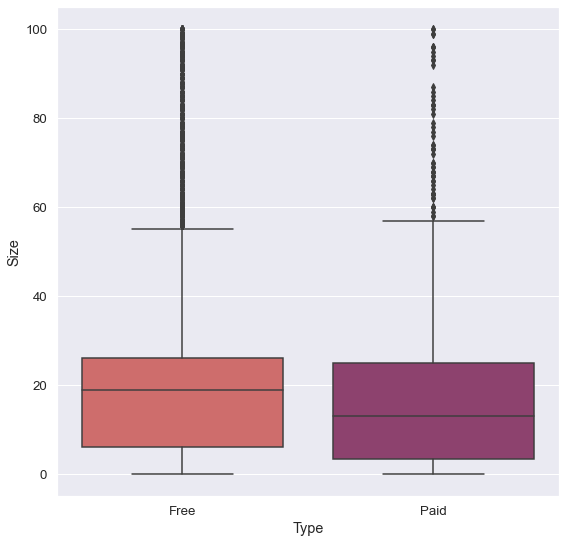

In [131]:
sns.boxplot(x='Type', y='Size', data=df, palette='flare')

In [134]:
# is there a correlation between rating, Reviews, Size with the price of the app
df.corr()

,Rating,Reviews,Size,Price
Rating,1.000000,0.068018,0.074864,-0.020190
Reviews,0.068018,1.000000,0.128255,-0.009667
Size,0.074864,0.128255,1.000000,-0.022995
Price,-0.020190,-0.009667,-0.022995,1.000000


In [135]:
# is there a correlation between rating, Reviews, Size with the price of the app
df.corr()['Price']

Rating    -0.020190
Reviews   -0.009667
Size      -0.022995
Price      1.000000
Name: Price, dtype: float64

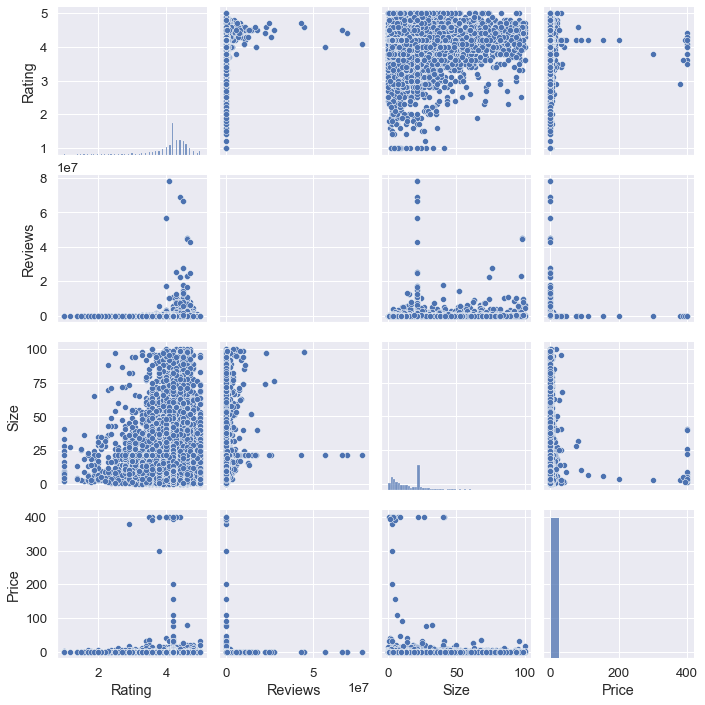

In [148]:
sns.pairplot(df)

<AxesSubplot:>

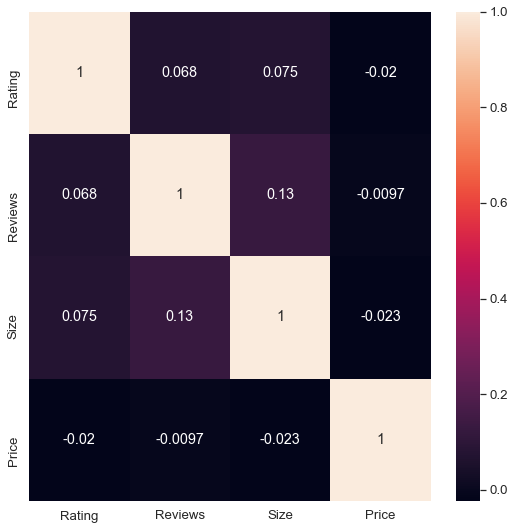

In [139]:
sns.heatmap(df.corr(), annot=True)

In [140]:
df.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'is_working_on_ver_4'],
      dtype='object')

In [141]:
# How many apps for each type for each content reading.
x = pd.pivot_table(index='Type', columns='Content Rating', values='Rating', data=df, aggfunc='count')
x

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,3.0,8019.0,381.0,479.0,1156.0,2.0
Paid,NaN,695.0,33.0,20.0,52.0,NaN


<AxesSubplot:xlabel='Content Rating', ylabel='Type'>

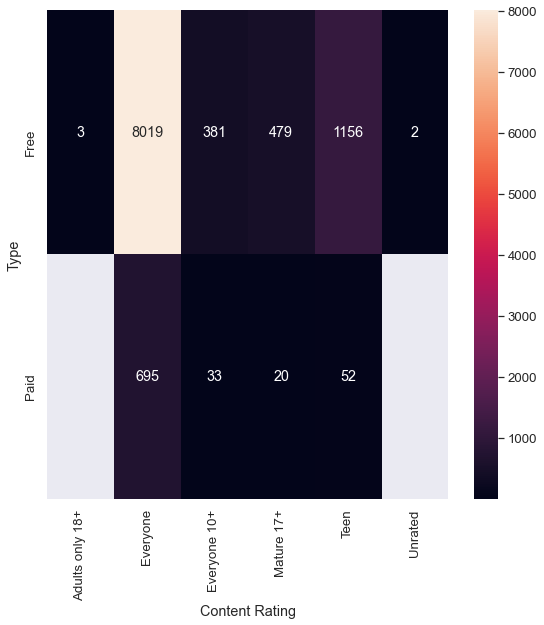

In [143]:
sns.heatmap(x, annot=True, fmt='0.0f')

In [145]:
# How many apps that can work on android version 4
df['is_working_on_ver_4'].value_counts()

Yes    6961
No     3879
Name: is_working_on_ver_4, dtype: int64

<AxesSubplot:xlabel='is_working_on_ver_4', ylabel='count'>

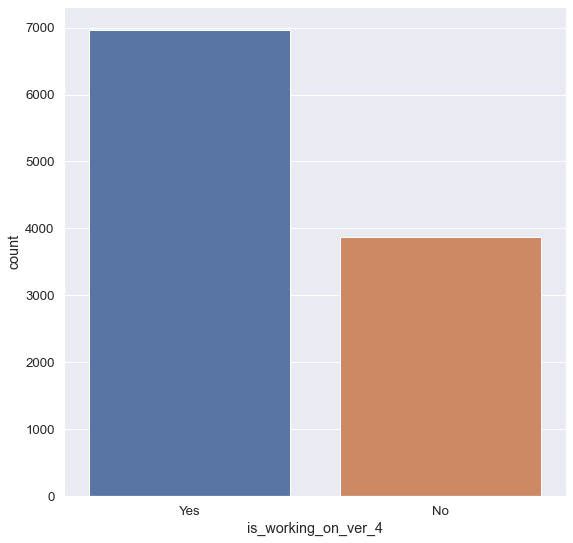

In [146]:
sns.countplot(x='is_working_on_ver_4', data=df)

# Introduction

The dataset is from kaggle you can view it and understand columns from this link
https://www.kaggle.com/lava18/google-play-store-apps


## Questions

- What is the most expensive app on the store.
- Which Genre has more apps.
- What is the average size of the free apps & paid apps.
- What is the 5 top expenisve apps that has rate of 5.
- How many apps that has more than 50K reviews.
- What is the average price of the apps for each genre with each installs numbers.
- How many apps have rating > 4.7 and what is thier avg price.
- How much google earned from the 5,000,000+ installed apps
- What is the max and min size for free and paid apps.
- is there a correlation between rating, Reviews, Size with the price of the app
- How many apps for each type for each content reading.
- How many apps that can work on android version 4

In [57]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,is_working_on_ver_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Yes
1,Coloring book moana,art_and_design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Yes
3,Sketch - Draw & Paint,art_and_design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Yes
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,family,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Yes
10837,Fr. Mike Schmitz Audio Teachings,family,5.0,4.0,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Yes
10838,Parkinson Exercices FR,medical,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,No
10839,The SCP Foundation DB fr nn5n,books_and_reference,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,No


In [33]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'is_working_on_ver_4'],
      dtype='object')

In [32]:
# What is the most expensive app on the store.

df[df['Price']==df['Price'].max()][['App','Price']]

,App,Price
4367,I'm Rich - Trump Edition,400.0


In [51]:
#Which Genre has more apps. Method(1)
df.groupby('Genres').count().sort_values(by='App',ascending=False).head(1)['App']

Genres
Tools    842
Name: App, dtype: int64

In [52]:
#Which Genre has more apps. Method(2)
df['Genres'].value_counts().head(1)

Genres
Tools    842
Name: count, dtype: int64

In [151]:
# What is the average size of the free apps & paid apps. Method (1)
df['Size'][df['Price']==0].mean(),df['Size'][df['Price']>0].mean()

(21.706139332194066, 19.306538112914364)

In [21]:
# What is the average size of the free apps & paid apps. Method (2)
df.groupby('Type')['Size'].mean()

Type
0        1.000000
Free    21.706139
Paid    19.306538
Name: Size, dtype: float64

In [56]:
df['Size'].mean()

21.51616543577433

In [69]:
# What is the 5 top expenisve apps that has rate of 5.
df[df['Rating']==5].sort_values(by='Price',ascending=False)[['App','Price','Rating']].head(5)

,App,Price,Rating
5489,AP Art History Flashcards,29.99,5.0
7477,USMLE Step 2 CK Flashcards,19.99,5.0
5246,Hey AJ! It's Bedtime!,4.99,5.0
7204,TI-84 CE Graphing Calculator Manual TI 84,4.99,5.0
5482,meStudying: AP English Lit,4.99,5.0


In [77]:
# How many apps that has more than 50K reviews.
df['App'][df['Reviews']>50000].count()

2782

In [90]:
# What is the average price of the apps for each genre with each installs numbers. Method (1)
df.pivot_table(index='Genres',columns='Installs',values='Price')

Installs,0,0+,1+,"1,000+","1,000,000+","1,000,000,000+",10+,"10,000+","10,000,000+",100+,...,"100,000,000+",5+,"5,000+","5,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
Genres,,,,,,,,,,,,,,,,,,,,,
Action,NaN,NaN,NaN,0.3725,0.320357,NaN,0.0,1.871875,0.012532,1.096000,...,0.0,NaN,0.000,0.0,0.663333,0.398667,0.0,0.00,0.090455,0.0
Action;Action & Adventure,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,3.490000,0.000000,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.99,NaN,NaN
Adventure,NaN,NaN,NaN,3.1940,0.082500,NaN,0.0,1.247500,0.000000,1.993333,...,0.0,NaN,3.495,0.0,NaN,0.831667,0.0,NaN,0.000000,NaN
Adventure;Action & Adventure,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,4.990000,NaN,NaN,NaN,NaN
Adventure;Brain Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Video Players & Editors,NaN,NaN,NaN,0.1100,0.000000,0.0,0.0,0.204706,0.000000,0.000000,...,0.0,NaN,0.000,0.0,NaN,0.855714,0.0,0.00,0.000000,0.0
Video Players & Editors;Creativity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
Video Players & Editors;Music & Video,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# What is the average price of the apps for each genre with each installs numbers. Method(2)
df.groupby(['Genres','Installs'])['Price'].mean()

Genres  Installs   
Action  1,000+         0.372500
        1,000,000+     0.320357
        10+            0.000000
        10,000+        1.871875
        10,000,000+    0.012532
                         ...   
Word    5,000,000+     0.000000
        50+            0.000000
        50,000+        0.000000
        50,000,000+    0.000000
        500+           0.000000
Name: Price, Length: 922, dtype: float64

In [106]:
# How many apps have rating > 4.7 and what is thier avg price.
df['App'][df['Rating']>4.7].count(),df['Price'][df['Rating']>4.7].mean()

(595, 0.5018487394957983)

In [113]:
# How much google earned from the 5,000,000+ installed apps
df['Price'][df['Installs']=='5,000,000+'].sum()

0.0

In [119]:
# What is the max and min size for free apps.  Method(1)
df['Size'][df['Price']==0].max(),df['Size'][df['Price']==0].min()


(100.0, 0.00830078125)

In [120]:
# What is the max and min size for paid apps. Method(1)
df['Size'][df['Price']>0].max(),df['Size'][df['Price']>0].min()

(100.0, 0.013671875)

In [129]:
# What is the max and min size for free and paid apps. Method(2)
df.groupby('Type')['Size'].min(),df.groupby('Type')['Size'].max()

(Type
 Free    0.008301
 Paid    0.013672
 Name: Size, dtype: float64,
 Type
 Free    100.0
 Paid    100.0
 Name: Size, dtype: float64)

In [130]:
# What is the max and min size for free and paid apps. Method(3)
df.groupby('Type')['Size'].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,8421.0,21.706139,22.617927,0.008301,5.0,13.00,30.0,100.0
Paid,724.0,19.306538,22.146741,0.013672,2.9,9.55,28.0,100.0


In [138]:
# is there a correlation between rating, Reviews, Size with the price of the app
df.corr(numeric_only=True)['Price']

Rating    -0.021903
Reviews   -0.009667
Size      -0.023007
Price      1.000000
Name: Price, dtype: float64

In [152]:
# How many apps for each type for each Content Rating.
df.groupby(['Type','Content Rating']).count()['App']

Type  Content Rating 
Free  Adults only 18+       3
      Everyone           8019
      Everyone 10+        380
      Mature 17+          479
      Teen               1156
      Unrated               2
Paid  Everyone            695
      Everyone 10+         33
      Mature 17+           20
      Teen                 52
Name: App, dtype: int64

In [153]:
# How many apps that can work on android version 4
df['App'][df['is_working_on_ver_4']=='Yes'].count()

6959